In [1]:
import pandas as pd
import numpy as np


from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
categorical = pd.read_csv('categorical.csv')

In [3]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


In [4]:
numerical = pd.read_csv('numerical.csv')

In [5]:
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


In [6]:
target = pd.read_csv('target.csv')

In [7]:
target.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [8]:


from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categorical)

# Here, after applying the encoder the resulting array will have lots of 0's. When this happens, by default 
# sklearn returns a new type of variable called "np.sparse_array". This new type of variable saves a lot of
# memory because it only stores the location of the non 0 values for each row. However, we can't visualize it
# To avoid this, we need to use .toarray()
categorical_encoded = encoder.transform(categorical).toarray()

# Here, the encoder will automatically assign new columns names based on the possible values of each column as
# "column_name" + "_" + "value". Those values were NOT PRESENT in the original categoricals_train df. Therefore,
# we can't simply add the option "columns = categoricals_train df" because we will have a missmatch. However,
# the new column names are stored in the encoder and we can access to them with the method: 
# encoder.get_feature_names_out()
# that we need to assign to the option "columns=" when we define the df.
categorical_encoded = pd.DataFrame(categorical_encoded, columns = encoder.get_feature_names_out())

display(categorical_encoded.head())

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data = pd.concat([numerical, categorical_encoded, target], axis = 1)

In [10]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [11]:
data.shape

(95412, 636)

In [12]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [13]:
data['TARGET_D'].value_counts()

0.00     90569
10.00      941
15.00      591
20.00      577
5.00       503
         ...  
18.25        1
10.70        1
2.50         1
16.87        1
44.21        1
Name: TARGET_D, Length: 71, dtype: int64

In [14]:
def threshold (df, perc= 0.85):
    nulls_percent_df= pd.DataFrame(data.isna().sum()/len(data)).reset_index()
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']
    columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>perc]
    drop_columns_list = list(columns_above_threshold['column_name'])
    return drop_columns_list

In [15]:
 drop_columns_list= threshold(data)

In [16]:
 drop_columns_list

[]

we haven't a missing values

 Preparing Data For Training

In [17]:

y = data['TARGET_B']
X = data.drop(columns='TARGET_B') 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

OVERSAMPLING

In [18]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [19]:
X_train.shape
y_train[y_train== 0].shape

(63433,)

In [20]:


ros = RandomOverSampler(random_state=42)  

X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
display(pd.concat([X_train_over,y_train_over],axis=1).head())

print('Resampled dataset shape %s' % Counter(y_train_over))

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12,TARGET_D,TARGET_B
0,1002,27.000000,5,9,0,0,23,67,12,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1,61.611649,4,5,1,1,34,41,20,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,51.000000,5,9,0,1,36,39,25,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,2,73.000000,5,9,0,2,34,27,36,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1
4,0,87.000000,1,9,7,0,29,25,31,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


Resampled dataset shape Counter({0: 63433, 1: 63433})


In [21]:
X_test_over, y_test_over = ros.fit_resample(X_test, y_test)

print('Resampled dataset shape %s' % Counter(y_test_over))

Resampled dataset shape Counter({0: 27136, 1: 27136})


In [22]:
X_train = pd.DataFrame(X_train_over)
y_train = pd.DataFrame(y_train_over)

In [23]:
X_train.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12,TARGET_D
0,1002,27.000000,5,9,0,0,23,67,12,7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,61.611649,4,5,1,1,34,41,20,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,51.000000,5,9,0,1,36,39,25,7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,73.000000,5,9,0,2,34,27,36,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
4,0,87.000000,1,9,7,0,29,25,31,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y_train.head()

,TARGET_B
0,0
1,0
2,0
3,1
4,0


In [29]:
X_test = pd.DataFrame(X_test_over)
y_test = pd.DataFrame(y_test_over)

In [31]:
X_test.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12,TARGET_D
0,1002,61.611649,2,9,0,0,30,31,31,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,61.611649,6,9,5,0,38,21,44,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,41.000000,7,6,8,0,24,58,42,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0
3,0,84.000000,1,2,10,0,31,25,38,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,61.611649,5,9,0,0,21,0,36,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
y_test.head()

,TARGET_B
0,0
1,0
2,1
3,0
4,0


In [25]:
#X_train = X_train.drop(['TARGET_B'], axis = 1)
#y_train = y_traint.drop(['TARGET_B'], axis = 1)

In [35]:
X_test['TARGET_D'].value_counts()

0.00      27136
10.00      4762
15.00      3386
20.00      3369
5.00       3011
25.00      2608
11.00       758
12.00       739
8.00        720
30.00       668
14.00       633
6.00        603
7.00        590
21.00       585
4.00        477
16.00       431
3.00        412
9.00        393
35.00       308
17.00       281
13.00       254
19.00       175
23.00       169
100.00      160
50.00       157
18.00       145
22.00       121
24.00       103
32.00       101
40.00        98
28.00        84
26.00        79
27.00        78
2.00         75
38.00        68
75.00        65
1.00         64
12.50        56
31.00        45
60.00        40
16.87        27
7.50         26
36.00        22
29.00        22
42.00        21
200.00       20
4.50         19
37.00        18
43.00        18
13.92        16
48.00        15
41.00        14
33.00        14
47.00        13
Name: TARGET_D, dtype: int64

In [26]:
y_train['TARGET_B'].value_counts()

0    63433
1    63433
Name: TARGET_B, dtype: int64

In [38]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [39]:
y_test

,TARGET_B
0,0
1,0
2,1
3,0
4,0
...,...
54267,1
54268,1
54269,1
54270,1


In [40]:
y_test_regression

0         0.0
1         0.0
2        15.0
3         0.0
4         0.0
         ... 
54267    25.0
54268     8.0
54269     8.0
54270    21.0
54271    18.0
Name: TARGET_D, Length: 54272, dtype: float64

Apply the Random Forests algorithm but this time only by upscaling the data.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

C:\Users\NON\AppData\Local\Temp/ipykernel_14856/772076091.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


The R2 for the Random Forest in the TRAIN set is 0.62
The R2 for the Random Forest in the TEST  set is 0.58


TARGET_B
0           27136
1           27136
dtype: int64

array([[16385, 10751],
       [11917, 15219]], dtype=int64)

Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

In [47]:
print("The confusion matrix on the test set is: ")
cm_test = confusion_matrix(y_test, y_pred)
cm_test

The confusion matrix on the test set is: 


array([[16385, 10751],
       [11917, 15219]], dtype=int64)

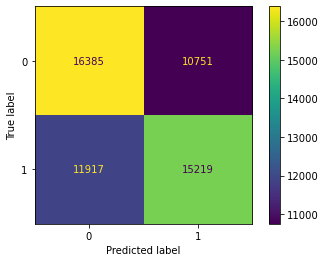

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test);
disp.plot()
plt.show()